# Mod 1 Project 

## Importing Data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
%matplotlib inline


In [2]:
df = pd.read_csv("kc_house_data.csv")

## Aims and Articles:

https://en.wikipedia.org/wiki/King_County,_Washington
https://www.seattletimes.com/business/real-estate/why-are-seattle-area-home-prices-so-high/

Aims to keep in mind:
We need pick at least 3 coefficients for your final model of house price.

Explain their impact on the price of a house in this dataset.

Your model should not include any predictors with p-values greater than .05.

# EDA

## Basics

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


^ gives us a general overview to spot any problems with the data
There is no data that is negative when it should be positive

A house with 33 bedrooms! Worth checking out in case its an anomoly

describe() not showing date column (expected, as this may be a datetime object)

describe() not showing sqft_basement column, which is interesting and needs a look at



In [6]:
df.shape

(21597, 21)

Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - The year the house was most recently sold
* **pricePrice** -  is prediction target (so is this not sales price?)
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  square footage of the home
* **sqft_lotsquare** -  square footage of the lot (ie the size of the land the house is on)
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront 
* **view** - Has been viewed (given as a number of views, most viewed house has 4)
* **condition** - How good the condition is ( Overall ) (ranked from 1 to 5)
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate (worth noting these are negative latitudes)
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Shows that we have null values in the waterfront, view, and yr_renovated columns

In [8]:
duplicates = df.duplicated(subset=["id"], keep="first")
display(duplicates.value_counts())
print("\n")
duplicates = df.duplicated(subset=["id", "date"], keep="first")
display(duplicates.value_counts())

False    21420
True       177
dtype: int64

False    21597
dtype: int64

This suggests that we dont have duplicate entries
177 properties were resold

In [9]:
for x in list(df.columns):
    print(df[x].value_counts().head(10))

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
3/25/2015    123
7/9/2014     121
4/28/2015    121
4/22/2015    121
4/14/2015    121
Name: date, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
Name: price, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
Name: bathrooms, dtype: int64
1300    138
1400    135
1440    133
1660    129
1010    129
1800    129
1820    128
1480    125
1720    125
1540    124
Name: sqft_living

sqft_basement has ? as a placement holder value 

## Further exploration - Histograms and Scatter Plots 

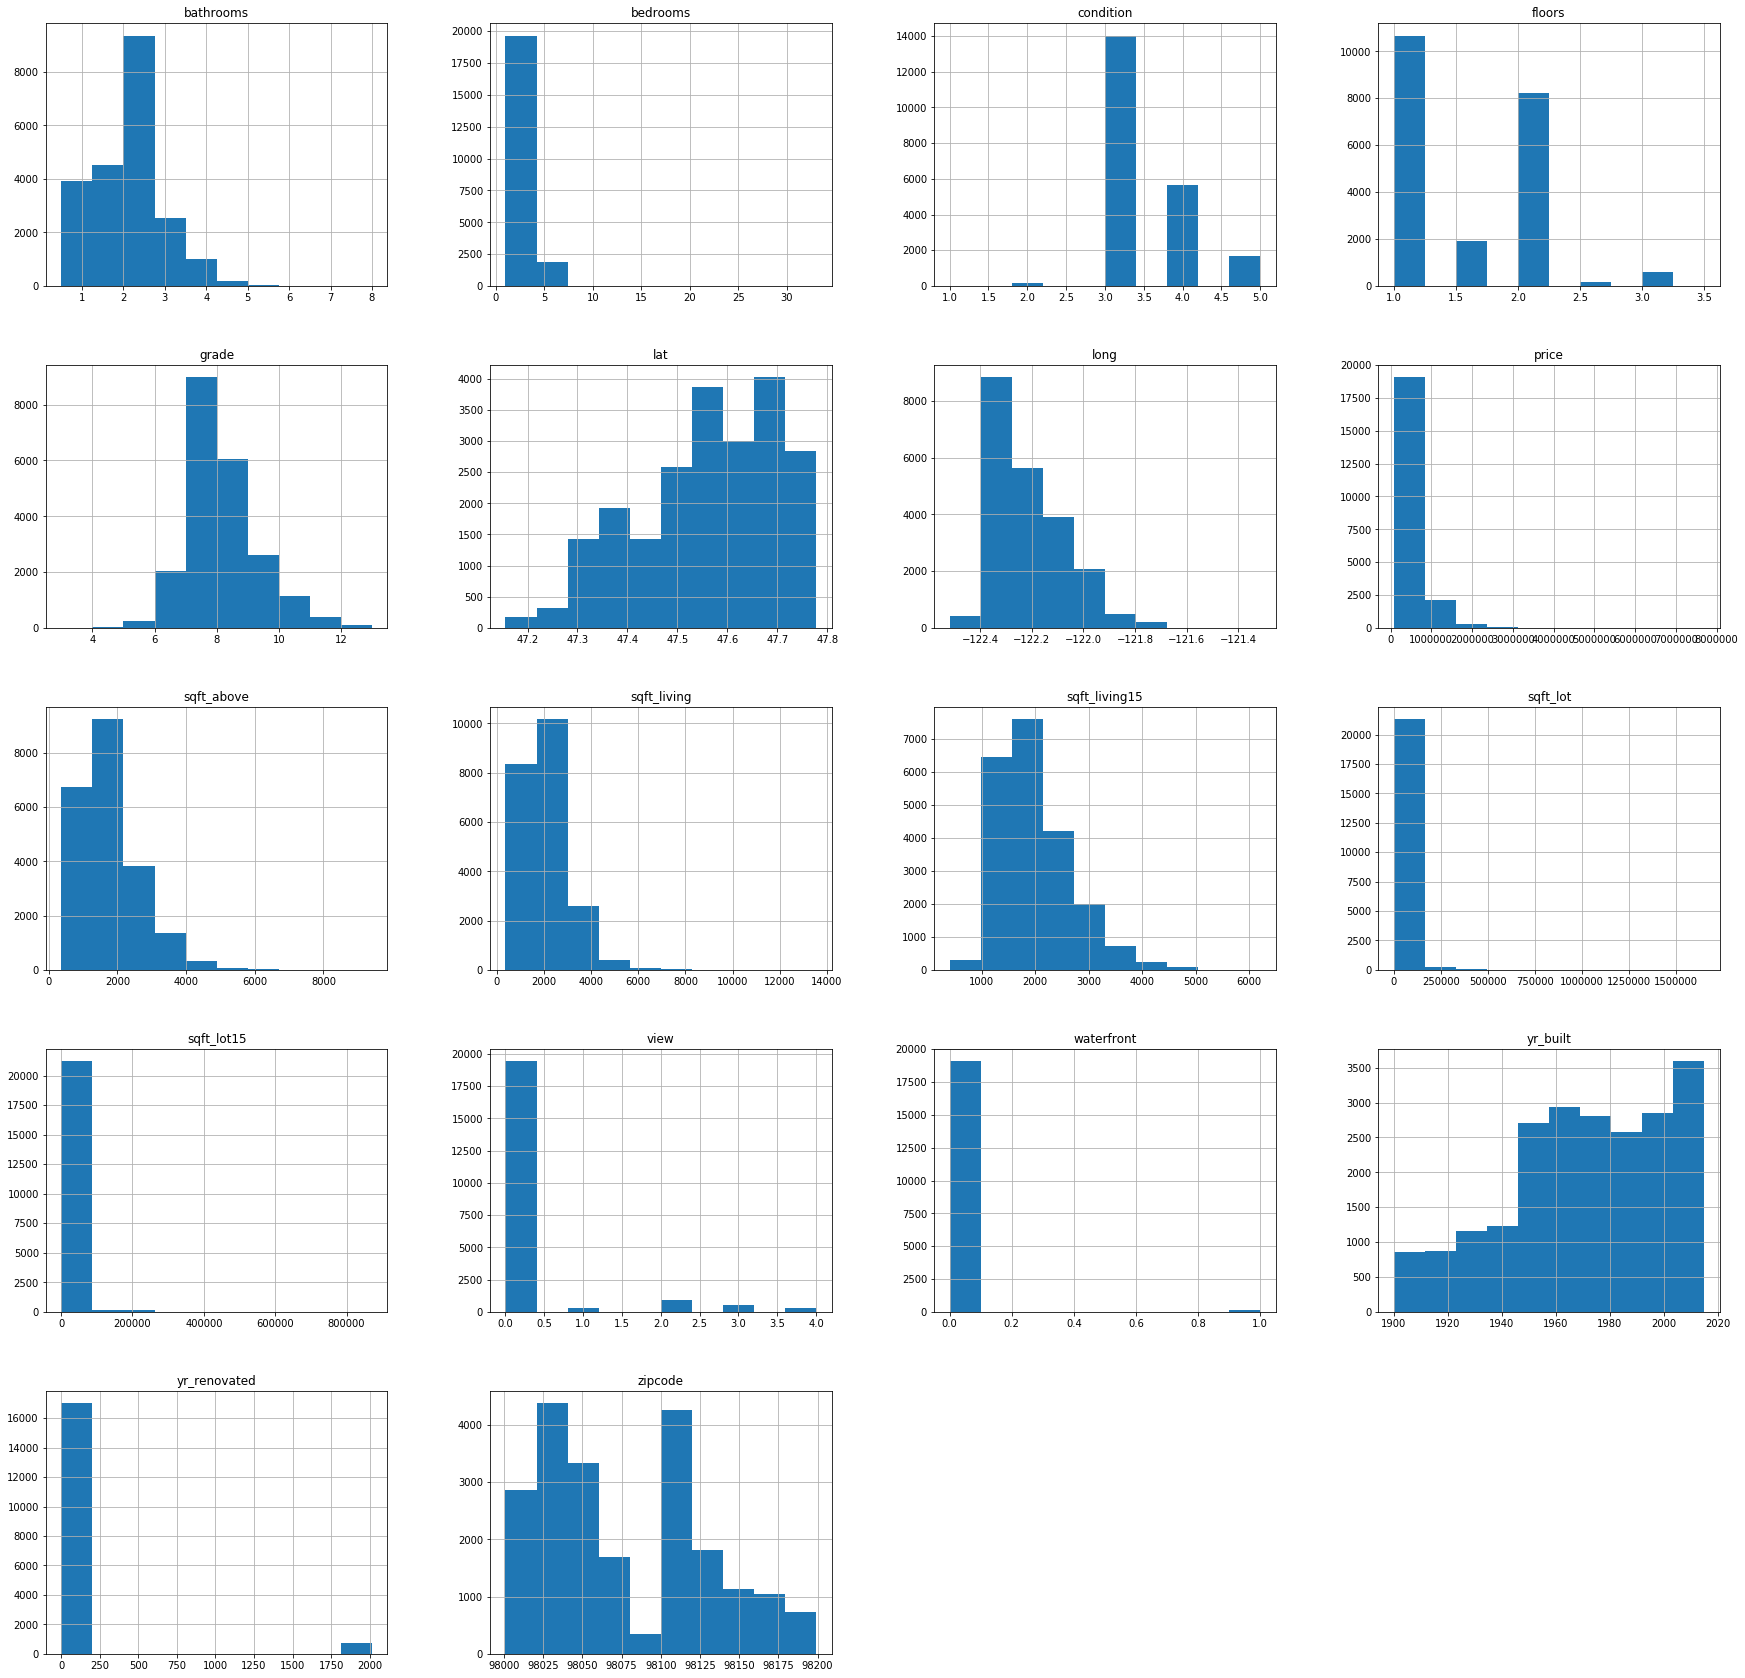

In [10]:
df_subset1 = df.drop(columns=["id", "date"], axis = 1)
df_subset1.hist(figsize  = [30, 30])
plt.show()


Helping us get to know the data better, nothing looks too out of the ordinary here

yr_renovated used 0 as a value for 'never renovated' which will make that data less useful unless adressed

Worth noting that some of these distrubutions look more normal than others, will be useful when deciding later which parameters to include in the model

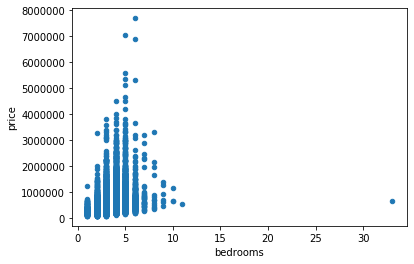

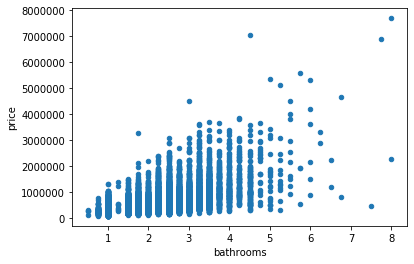

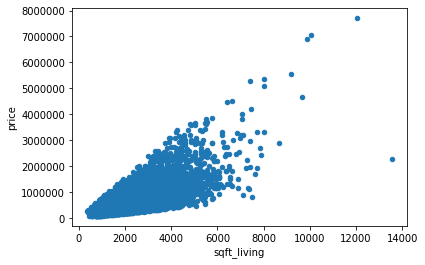

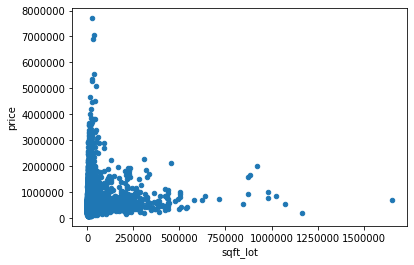

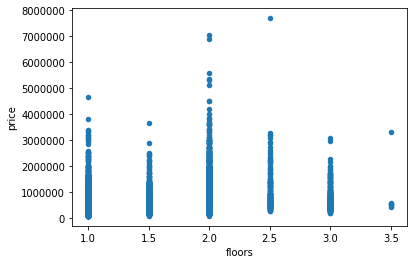

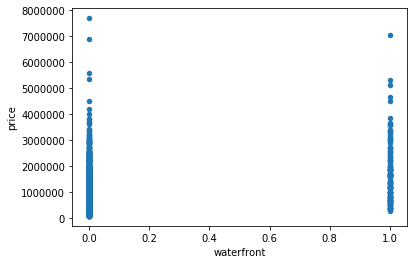

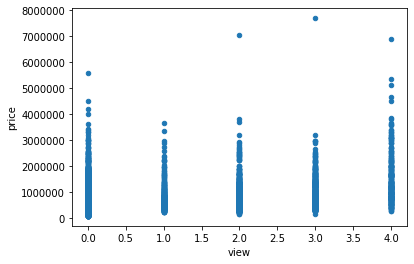

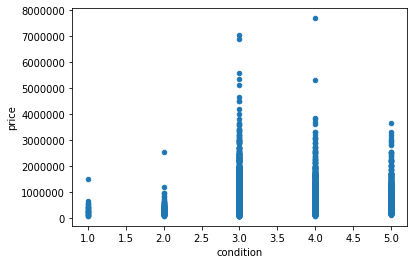

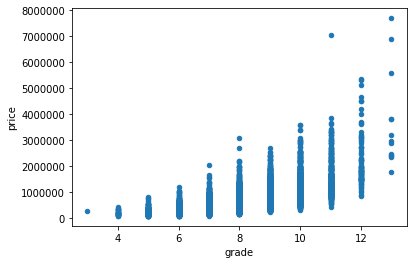

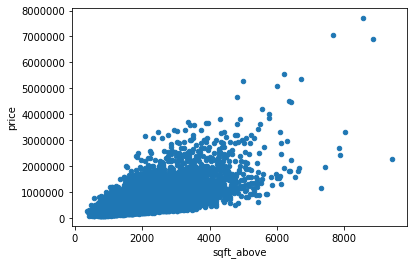

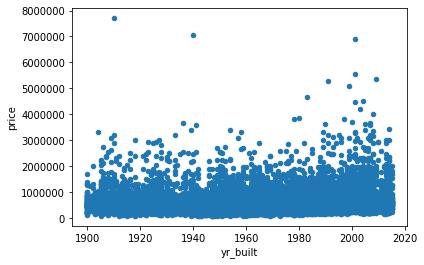

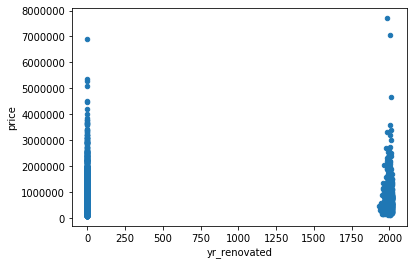

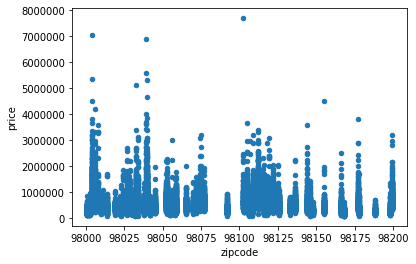

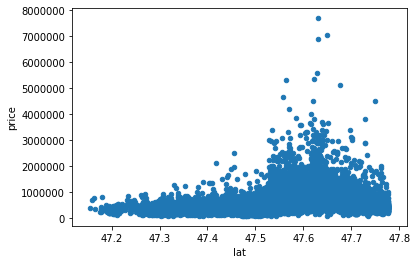

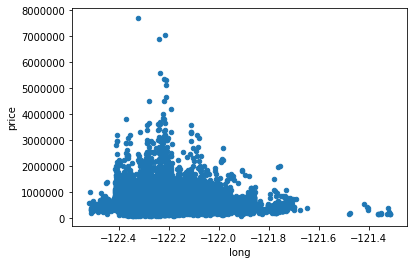

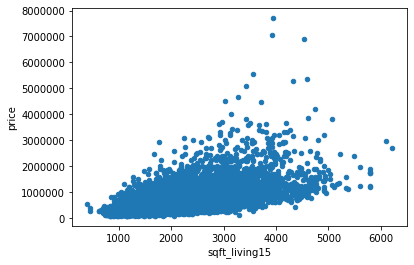

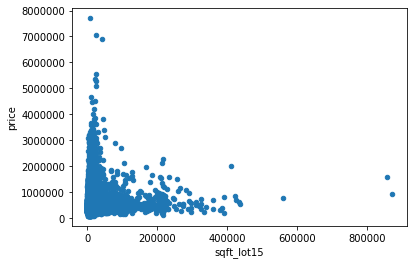

In [11]:
for x in ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    df.plot.scatter(x,'price')
    
##sqft_basement not included as it still has placement value ?

Some of these are clearly categorical, worth noting as they will need addressing to include them in our model!

These outliers stood out to us:

In [12]:
df.loc[df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [13]:
df.loc[(df["bedrooms"]==9)&(df['bathrooms']==7.5)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8537,424049043,8/11/2014,450000.0,9,7.5,4050,6504,2.0,0.0,0.0,...,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866


In [14]:
df.loc[df["sqft_living"]>13000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [15]:
df.loc[df["sqft_lot"] > 1600000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,3/27/2015,700000.0,4,1.0,1300,1651359,1.0,0.0,3.0,...,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581


In [16]:
df.loc[df["sqft_lot15"] > 800000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,225079036,1/7/2015,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,...,11,3605,1940.0,2003,0.0,98014,47.676,-121.882,3420,871200
20436,1125079111,4/15/2015,1600000.0,4,5.5,6530,871200,2.0,0.0,2.0,...,11,6530,0.0,2008,0.0,98014,47.664,-121.878,1280,858132


## Total Findings

Columns:

1- 'waterfront' and 'view' columns have null values that need dealing with

2 - We need to work on the ?s in the basement situation and check that the two square foots add to total sqr foot

3 - 'yr_renovated' 0.0 needs addressing, reassign zeros to yr_built, and has null values


Outliers:
    
1 - 33 bedroom house for $600k 

2 - 9 bedroom 7.5 bathroom house, for 450k in central Seattle zipcode with mean $600k

3 - sqft_living =  13540 for $2.28mil in the outskirts

4 - sqft_lot = 1651359 for $700k

5 - Two sqft_lot_15 = ~800000 which are nearly twice as large as any others in 20,000 dataset



## Dealing with null colums

In [17]:
df_test = df.copy()
df_test['waterfront'].fillna(value=2, inplace=True)
df_test.groupby('waterfront')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0.0,19075.0,5.326420e+05,3.449592e+05,78000.0,320000.0,450000.0,638600.0,7700000.0
1.0,146.0,1.717215e+06,1.145385e+06,285000.0,827500.0,1510000.0,2282500.0,7060000.0
2.0,2376.0,5.294301e+05,3.250794e+05,80000.0,322875.0,445000.0,649612.5,3200000.0


This shows us that the null values for the waterfront column closely align to the values for no waterfront view
This is our justification for reassigning the null value to zero, instead of to the mean or median 

In [18]:
df['waterfront'].fillna(value=0, inplace=True)
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

Waterfront column cleaned!

In [19]:
df_test = df.copy()
df_test['view'].fillna(value=10, inplace=True)
df_test.groupby('view')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
view,,,,,,,,
0.0,19422.0,4.968061e+05,287419.959567,78000.0,311525.0,432500.0,600000.0,5570000.0
1.0,330.0,8.133733e+05,512776.626107,217000.0,498250.0,691944.0,923750.0,3650000.0
2.0,957.0,7.913904e+05,510385.693444,169317.0,485000.0,675000.0,938000.0,7060000.0
3.0,508.0,9.732852e+05,613898.399842,154000.0,558000.0,802500.0,1260000.0,7700000.0
4.0,317.0,1.452466e+06,930747.701932,252000.0,815000.0,1180000.0,1850000.0,6890000.0
10.0,63.0,6.219582e+05,680927.087594,144000.0,322475.0,480000.0,679000.0,5300000.0


This shows us that the null values for the view column closely align to the values for zero views

This is our justification for reassigning the null value to zero, instead of to the mean or median 

In [20]:
df['view'].fillna(value=0, inplace=True)

View column cleaned!

yr-renovated column has many values that are 0.0, ie not renovated. There is no harm in reassigning these values to be equal to the year the house was built. Then we need to deal with the null values in this yr-renovated column.

In [ ]:
#placeholder yr_built for 0 and NaN
df["yr_renovated"] = df["yr_renovated"] 


def proxy_yr_renovated(x):
    if ((x["yr_renovated"] == 0.0)| (np.isnan(x["yr_renovated"]))):
        return x["yr_built"]
    else:
        return x["yr_renovated"]

df["yr_renovated"] = df.apply(lambda x: proxy_yr_renovated(x), axis = 1)

df["yr_renovated"] = df["yr_renovated"].astype('int64')

df.head()

Then we need to deal with the null values in this yr-renovated column

Next, we will address the ? in the basement column. 
We will replicate column basement into a new column (basement2).
We will add a check_flr column to check if above + basement2 = living.
We will check to see if above + basement2 != living occur when there are ?'s or occur throughout the data.
We will reassign all the incorrect basement values to be living - above.

In [21]:
#copy basement (basement2): placeholder 0 for ?, change dtype to float
df["sqft_basement2"] = df.sqft_basement
df["sqft_basement2"].replace(to_replace = "?", value = 0, inplace = True) 
df["sqft_basement2"] = df["sqft_basement2"].astype(dtype = "float64") 
df.loc[df["sqft_basement"] == "?"].head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

dtype('O')

,sqft_above,sqft_living,sqft_basement,check_flr,sqft_basement2
112,1160,1540,?,False,0.0
115,2780,4380,?,False,0.0
309,2220,3320,?,False,0.0
384,3480,4800,?,False,0.0
508,820,1540,?,False,0.0


?    170
Name: sqft_basement, dtype: int64

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2810.0        1
666.0         1
65.0          1
2250.0        1
176.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [22]:
#added check_flr column to check if above + basement2 = living
df["check_flr"] = pd.Series(df["sqft_above"] + df["sqft_basement2"] == df["sqft_living"])
df.loc[df["check_flr"] == False]['sqft_basement'].value_counts()
#all false are those with 0 as placeholder. we can conclude that above+ basement = living

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [23]:
#replace basement with living less above
df["sqft_basement"] =  df["sqft_living"] - df["sqft_above"]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [24]:
#remove basement2 and check_flr
df.drop(columns = ["check_flr", "sqft_basement2"], inplace = True)
df.head()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

We have found all the houses where the sqft_above + sqft_basement doesn't equal sqft_living. It only happens when there are ? involved. In those cases, we have reassigned the ? to be the correct values, so that they satify the equation!

## Dealing with outliers

In [25]:
df.loc[df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580,1947,0.0,98103,47.6878,-122.331,1330,4700


In [26]:
df.loc[df["sqft_living"]==1620].sort_values('bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4353,3364900375,4/23/2015,750000.0,2,1.00,1620,6120,1.0,0.0,0.0,...,7,1620,0,1951,0.0,98115,47.6731,-122.326,1650,4590
18828,4443800785,11/21/2014,481000.0,2,1.00,1620,3880,1.0,0.0,0.0,...,7,920,700,1924,0.0,98117,47.6855,-122.391,1330,3880
20139,3629960680,9/26/2014,395000.0,2,2.25,1620,1841,2.0,0.0,0.0,...,8,1540,80,2004,0.0,98029,47.5483,-122.004,1530,1831
18249,6600220090,11/18/2014,475000.0,2,2.50,1620,14467,2.0,0.0,0.0,...,7,1620,0,1981,0.0,98074,47.6306,-122.035,1470,13615
9228,3524039144,10/7/2014,700000.0,2,1.00,1620,9855,1.0,0.0,4.0,...,8,1320,300,1948,0.0,98136,47.5264,-122.384,1820,7700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,9542840570,4/1/2015,305000.0,4,2.50,1620,4000,2.0,0.0,0.0,...,7,1620,0,2008,0.0,98038,47.3661,-122.020,1580,3780
16505,4036801315,11/4/2014,425000.0,4,1.50,1620,7875,1.0,0.0,0.0,...,7,1620,0,1956,0.0,98008,47.6041,-122.126,1890,8400
9276,3856904610,10/2/2014,485000.0,4,1.00,1620,4080,1.5,0.0,0.0,...,7,1620,0,1923,NaN,98105,47.6696,-122.324,1760,4080
11457,2826049200,8/25/2014,451000.0,4,1.50,1620,5444,1.5,0.0,0.0,...,8,1620,0,1955,0.0,98125,47.7065,-122.297,1620,6912


In [27]:
Enough evidence to change the bedroom to a 3 bedroom house!

SyntaxError: invalid syntax (<ipython-input-27-ac6a783fe93e>, line 1)

This is checking to see if there are any suspiciously common values
This might indicate there are placement values
sqft_basement has a ? placement value

In [ ]:
df.loc[df["bedrooms"]==33]

The house with 33 bedroom looks alot like a house with 3 bedrooms! Possible typing error?

In [ ]:
df.loc[df["sqft_living"]==1620].sort_values('bedrooms')

By looking at all the other similarly sized houses (by sqft) we can clearly see that the 33 bedroom house is a weird exception. We have a good arguement for just changing it to a 3 bedroom house. We also looked at the Latitude and Logitude and it was not a 3 bedroom house in that location, it was no bigger than any other houses near it. 

In [ ]:
df.iloc[15856, df.columns.get_loc('bedrooms')] = 3

In [ ]:
df.iloc[15856, df.columns.get_loc('bedrooms')]

9 bed 7.5 bathroom house in Seattle city centre 450k, except mean is 600k and its by far the biggest house in the neighbourhood
Drop it!

In [ ]:
df.loc[df["bathrooms"] > 7].sort_values(by = "price")

#index 8537 potential outlier

In [ ]:
df.drop(index = 8537, axis = 0, inplace = True)
df.loc[df["bathrooms"] > 7].sort_values(by = "price")

We also drop a sqft_living = 13540 for 2.28mil in the outskirts and a sqft_lot = 1651359 for 700k, although they may be priced correctly
Logically, we weren't sure how there could be 2 values of sqft_lot15 that were so massive (800000>), so we removed them too
They are so weird that it is worth sacking them 

In [ ]:
df.loc[df["sqft_living"] > 13000].sort_values(by = "price")

In [ ]:
df.loc[df['zipcode'] == 98053].sort_values(by = "sqft_living", ascending = False)

#index 12764 potential outlier.

In [ ]:
df.drop(index = 12764, axis = 0, inplace = True)
df.loc[df["sqft_living"] > 13000].sort_values(by = "price")

In [ ]:
df.loc[df["sqft_lot"] > 1300000].sort_values(by = "price")

In [ ]:
df.loc[df['zipcode'] == 98022].sort_values(by = "sqft_lot", ascending = False)

#index 1717 potential outlier.

In [ ]:
df.drop(index = 1717, axis = 0, inplace = True)
df.loc[df["sqft_lot"] > 1300000].sort_values(by = "price")

In [ ]:
pd.DataFrame(df.sort_values(by = "sqft_lot15", ascending = False)[['price','sqft_lot15']]).head(10)

#potential outlier 9705, 20436

In [ ]:
df.loc[df['sqft_lot15'] > 800000].sort_values(by = 'price', ascending = False)

In [ ]:
df.drop(index = [20436, 9705], axis = 0, inplace = True)
df.loc[df['sqft_lot15'] > 800000].sort_values(by = 'price', ascending = False)

Now we have clean enough data! 

## Some interesting questions

Apart from building a model to predict a house's price, we want to address a few things more in detail.

1 - How crazy was the housing market in Seattle in 2014/2015?

Houses that were sold and resold in this period increased in price how much?

2 - "What year's houses were built the best?"

We would expect that in general, as houses get old, their condition would worsen. Is there a year/decade that bucks this trend, because theyre houses were built to withstand deterioration better?


3 - "Is it worth adding another bathroom, assuming it costs $25,000 to do so?"

If all else is held steady in our model, will adding a bathroom increase price by 25k?
Do houses in our data show an average increase of 25k if they have one more bathroom?

We will answer these questions later once we have an accurate model to help us!

# Gameplan for Model

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap((((df_subset1.corr() >= 0.7) | (df_subset1.corr() <= -0.7)) & (df_subset1.corr() != 1)), center=0)

In [ ]:
display(df.head())
display(df.columns)

Given how different pricing v expensive houses in the city is vs pricing cheap houses in the suburbs is, we think it is smart to split our model up. Splitting by postcode, by waterfront and by price is similar, as the 4 postcodes around the waterfront are also the 4 most expensive. We will try find a split which allows us to price better, and this is the first we will try!

# Scaling and Normalisation

Work on how we are going to split our zip codes here...

In [ ]:
#create a subset of all possible predictors

In [ ]:
df_pred = df[['sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15','yr_built','condition', 'waterfront', 'zipcode']]
df_pred.head()

In [ ]:
df_pred.describe()

In [ ]:
#transform categorical predictor: zipcode and yr_built

In [ ]:
display(df_pred["zipcode"].nunique(dropna = False))
display(df_pred["zipcode"].describe())

In [ ]:
zipcode_series = pd.Series(df_pred["zipcode"])
cat_zipcode = zipcode_series.astype('category')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
zipcode_encoded = lb_make.fit_transform(cat_zipcode)

In [ ]:
#replace column zipcode with zipcode encounded

In [ ]:
df_pred_scaled = pd.DataFrame()

df_pred_scaled['zipcode_scaled'] = pd.Series(zipcode_encoded)
df_pred_scaled.head()

In [ ]:
display(df_pred["yr_built"].nunique(dropna = False))
display(df_pred["yr_built"].describe())

In [ ]:
yr_built_series = pd.Series(df_pred["yr_built"])
cat_yr_built = yr_built_series.astype('category')
lb_make = LabelEncoder()
yr_built_encoded = lb_make.fit_transform(cat_yr_built)

In [ ]:
df_pred_scaled['yr_built_scaled'] = pd.Series(yr_built_encoded)
df_pred_scaled.head()

In [ ]:
df_pred.hist(figsize  = [10, 10]); 

In [ ]:
df_pred_log = pd.DataFrame()

for x in ['sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15']:
     df_pred_log[x+"_log"] = df_pred[x].map(lambda x: np.log(x))
df_pred_log.hist(figsize  = [10, 10])

In [ ]:
display(df_pred.columns)
display(df_pred_log.columns)

In [ ]:
df_final = pd.concat([df, df_pred_scaled, df_pred_log], axis =1)
df_final.columns

In [ ]:
df_working = df_final.copy()
df_working.drop(columns= ['id', 'date','bedrooms', 'bathrooms', 'floors','view','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis = 1, inplace=True)
df_working.head()

# Models


In [ ]:
formula = "price~waterfront+lat+yr_built+sqft_living_log+grade"
model = ols(formula = formula, data = df_final).fit()
model.summary()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
predictors = df_final.drop(['price','date','yr_renovated'], axis=1)
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(predictors, df_working['price'])

In [ ]:
selector.support_

In [ ]:
predictors.columns

In [ ]:
selector.ranking_

# Answering our interesting questions

## How crazy was the housing market in Seattle in 2014/2015?

## What year's houses have lasted the best?

We will plot condition against age, and expect to see a decent corrolation showing that the older houses are in poorer condition. We shouldn't include houses that that been renovated. We could even run a univariate analysis to find which year/time period buck the trend more that you'd expect.


In [ ]:
df_test = pd.read_csv("kc_house_data.csv")
df_condition_test = df_test.drop(columns=['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'])
df_condition_test.head()

In [ ]:
df2 = df_condition_test.copy()
df1 = df_condition_test.loc[(df_condition_test["yr_renovated"]>0.0)]
df1.index
df2.drop(index = df1.index, axis = 0, inplace = True)
df2.head()

In [ ]:
df2.drop(columns=['yr_renovated'])

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

df2.groupby(['yr_built']).mean().plot(ax=ax, ylim = (2.9,4.0), grid = True)



As we can see above, these houses have not been renovated, and the condition of them today varies. It is interesting to note that the houses that are currently in the best condition were those built in 1917, and those that were the worst was in 1931. The houses built in 1931 were those closest to the stock market crash of 1929 (very few houses built in 1930), and as there was uch less money, the houses were not built to last. Isn't it interesting how the condition of houses has been on a steady decline since 1975? 

## Is it worth adding another bathroom, assuming it costs $25,000 to do so? 


This question will be asked by looking at our final model